In [1]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import xlrd
import pandas as pd
import datetime
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

In [2]:
df = pd.read_excel("online_retail_data.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [3]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [4]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [5]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [6]:
data = pd.concat([df1, df2], ignore_index=True)

In [7]:
data.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [8]:
data.shape

(1067371, 8)

In [9]:
data.isnull().sum()/data.shape[0]*100 #checking for the null values

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [10]:
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [11]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [12]:
data[data["Customer ID"].isnull()]

Invoice StockCode                     Description  Quantity  \
263      489464     21733                    85123a mixed       -96   
283      489463     71477                           short      -240   
284      489467    85123A                     21733 mixed      -192   
577      489525    85226C       BLUE PULL BACK RACING CAR         1   
578      489525     85227     SET/6 3D KIT CARDS FOR KIDS         1   
...         ...       ...                             ...       ...   
1066997  581498    85099B         JUMBO BAG RED RETROSPOT         5   
1066998  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
1066999  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
1067000  581498     85174               S/4 CACTI CANDLES         1   
1067001  581498       DOT                  DOTCOM POSTAGE         1   

                InvoiceDate    Price  Customer ID         Country  
263     2009-12-01 10:52:00     0.00          NaN  United Kingdom  
283     2009-12-01 10:52:00     0.00          NaN  United Kingdom  
284     2009-12-01 10:53:00     0.00          NaN  United Kingdom  
577     2009-12-01 11:49:00     0.55          NaN  United Kingdom  
578     2009-12-01 11:49:00     0.85          NaN  United Kingdom  
...                     ...      ...          ...             ...  
1066997 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
1066998 2011-12-09 10:26:00     4.13          NaN  United Kingdom  
1066999 2011-12-09 10:26:00     4.96          NaN  United Kingdom  
1067000 2011-12-09 10:26:00    10.79          NaN  United Kingdom  
1067001 2011-12-09 10:26:00  1714.17          NaN  United Kingdom  

[238625 rows x 8 columns]

In [13]:
data.iloc[575:, :]

Invoice StockCode                      Description  Quantity  \
576      C489524     21258       VICTORIAN SEWING BOX LARGE        -1   
577       489525    85226C        BLUE PULL BACK RACING CAR         1   
578       489525     85227      SET/6 3D KIT CARDS FOR KIDS         1   
579       489526    85049E        SCANDINAVIAN REDS RIBBONS        12   
580       489526     21976   PACK OF 60 MUSHROOM CAKE CASES        24   
...          ...       ...                              ...       ...   
1067366   581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
1067367   581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
1067368   581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369   581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
1067370   581587      POST                          POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  
576     2009-12-01 11:48:00  12.75      15614.0  United Kingdom  
577     2009-12-01 11:49:00   0.55          NaN  United Kingdom  
578     2009-12-01 11:49:00   0.85          NaN  United Kingdom  
579     2009-12-01 11:50:00   1.25      12533.0         Germany  
580     2009-12-01 11:50:00   0.55      12533.0         Germany  
...                     ...    ...          ...             ...  
1067366 2011-12-09 12:50:00   2.10      12680.0          France  
1067367 2011-12-09 12:50:00   4.15      12680.0          France  
1067368 2011-12-09 12:50:00   4.15      12680.0          France  
1067369 2011-12-09 12:50:00   4.95      12680.0          France  
1067370 2011-12-09 12:50:00  18.00      12680.0          France  

[1062414 rows x 8 columns]

In [14]:
data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [15]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [16]:
data.head(10)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

In [17]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [18]:
temp_df.head(10)

count
Country               
United Kingdom  741301
Germany          17624
EIRE             16195
France           14202
Netherlands       5140
Spain             3811
Belgium           3123
Switzerland       3064
Portugal          2504
Australia         1913

In [19]:
names  = temp_df.index

In [20]:
import plotly.express as px

In [21]:
px.scatter(temp_df, x = 'count', color = names)

In [22]:
data["Quantity"] = pd.to_numeric(data["Quantity"], errors='coerce')

In [23]:
result = data.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10)
print(result)

Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64


In [24]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

In [25]:
countries = data["Country"].unique() #extracting unique country names

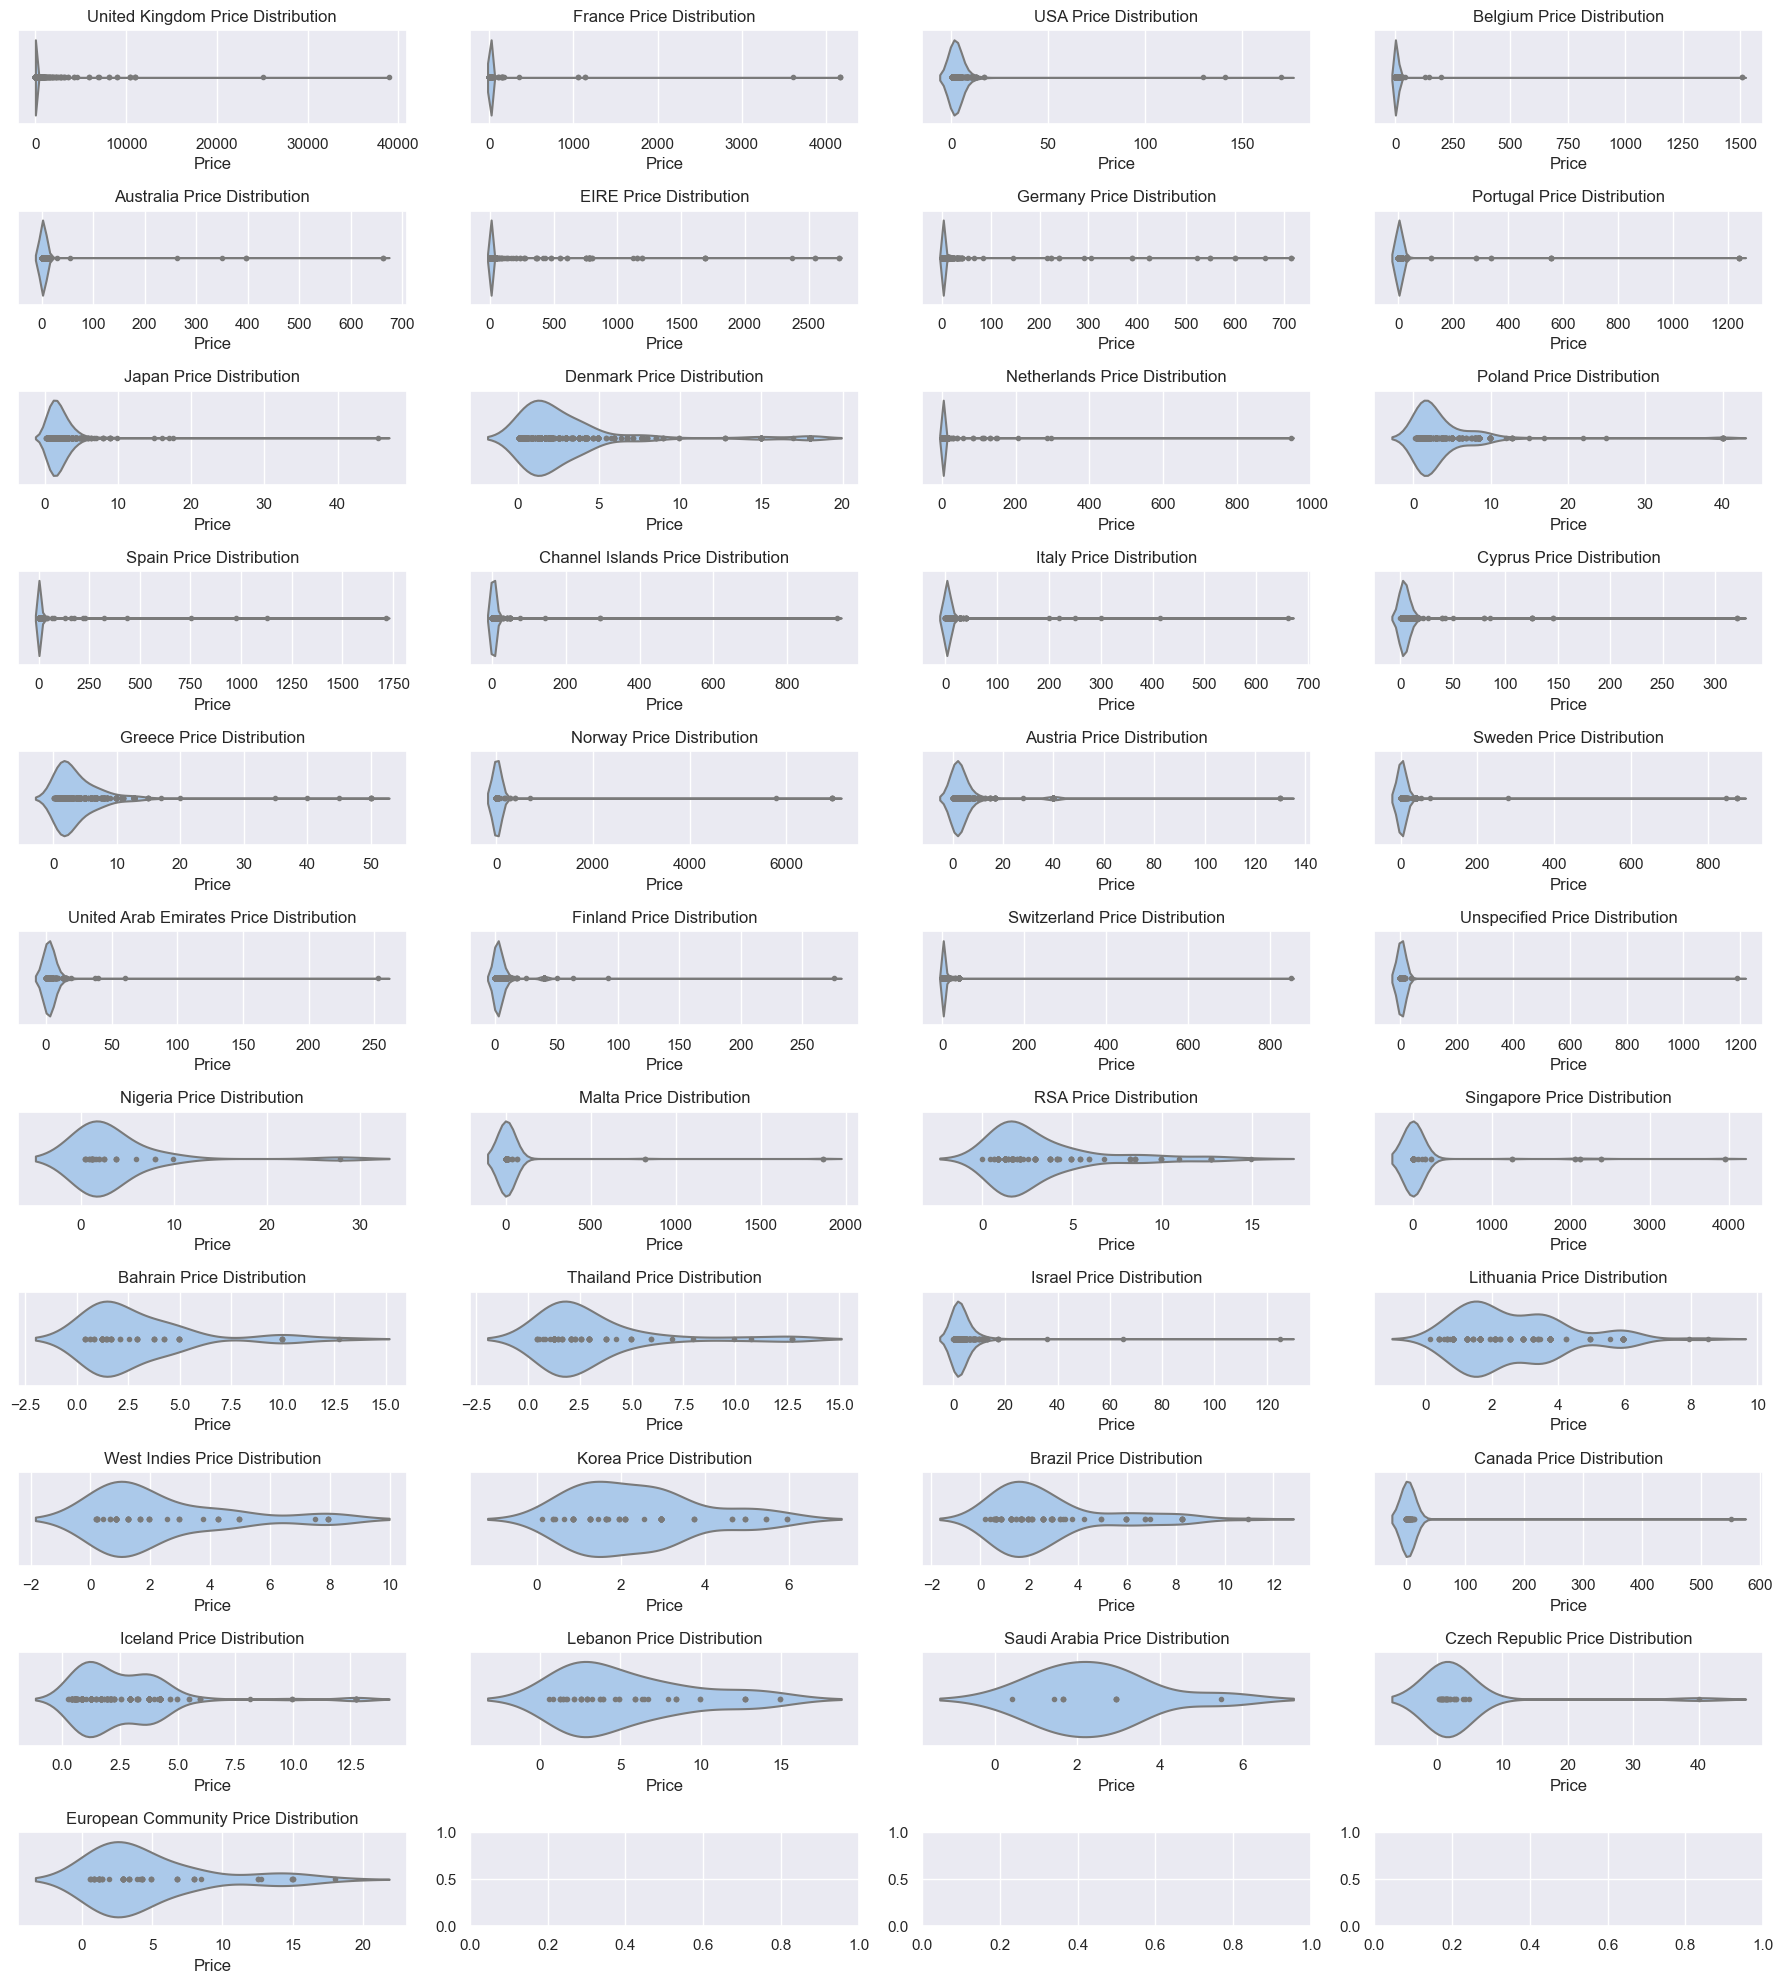

In [26]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

In [27]:
len(data["Invoice"].unique())

44876

In [28]:
numeric_columns = data.select_dtypes(include=['number']).columns

In [29]:
temp_invoice_df = data.groupby("Invoice")[numeric_columns].sum()

In [30]:
temp_invoice_df.reset_index(inplace = True)

In [31]:
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

In [34]:
# Ensure the Price column is numeric
data["Price"] = pd.to_numeric(data["Price"], errors="coerce")

# Group by Invoice, calculate mean of numeric columns, select the Price column, and sort
result = (
    data.groupby(["Invoice"])
    .mean(numeric_only=True)
    .head(15)
    .loc[:, ["Price"]]
    .sort_values("Price", ascending=False)
)

print(result)


              Price
Invoice            
489444   141.000000
489447   130.000000
489434     4.081250
489436     3.730526
489437     3.628261
489439     3.560000
489440     3.150000
489446     3.118519
489441     3.042500
489448     2.970000
489435     2.625000
489438     2.591176
489445     2.477895
489443     2.370000
489442     2.040870


In [35]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
126  489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.0   
173  489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.0   

     Customer ID  Country  
126      12636.0      USA  
173      12362.0  Belgium

In [36]:
data.head(15)

Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064           PINK DOUGHNUT TRINKET POT         24   
6   489434     21871                  SAVE THE PLANET MUG        24   
7   489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8   489435     22350                            CAT BOWL         12   
9   489435     22349       DOG BOWL , CHASING BALL DESIGN        12   
10  489435     22195         HEART MEASURING SPOONS LARGE        24   
11  489435     22353   LUNCHBOX WITH CUTLERY FAIRY CAKES         12   
12  489436    48173C                DOOR MAT BLACK FLOCK         10   
13  489436     21755             LOVE BUILDING BLOCK WORD        18   
14  489436     21754             HOME BUILDING BLOCK WORD         3   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5  2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7  2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8  2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9  2009-12-01 07:46:00   3.75      13085.0  United Kingdom  
10 2009-12-01 07:46:00   1.65      13085.0  United Kingdom  
11 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
12 2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
13 2009-12-01 09:06:00   5.45      13078.0  United Kingdom  
14 2009-12-01 09:06:00   5.95      13078.0  United Kingdom

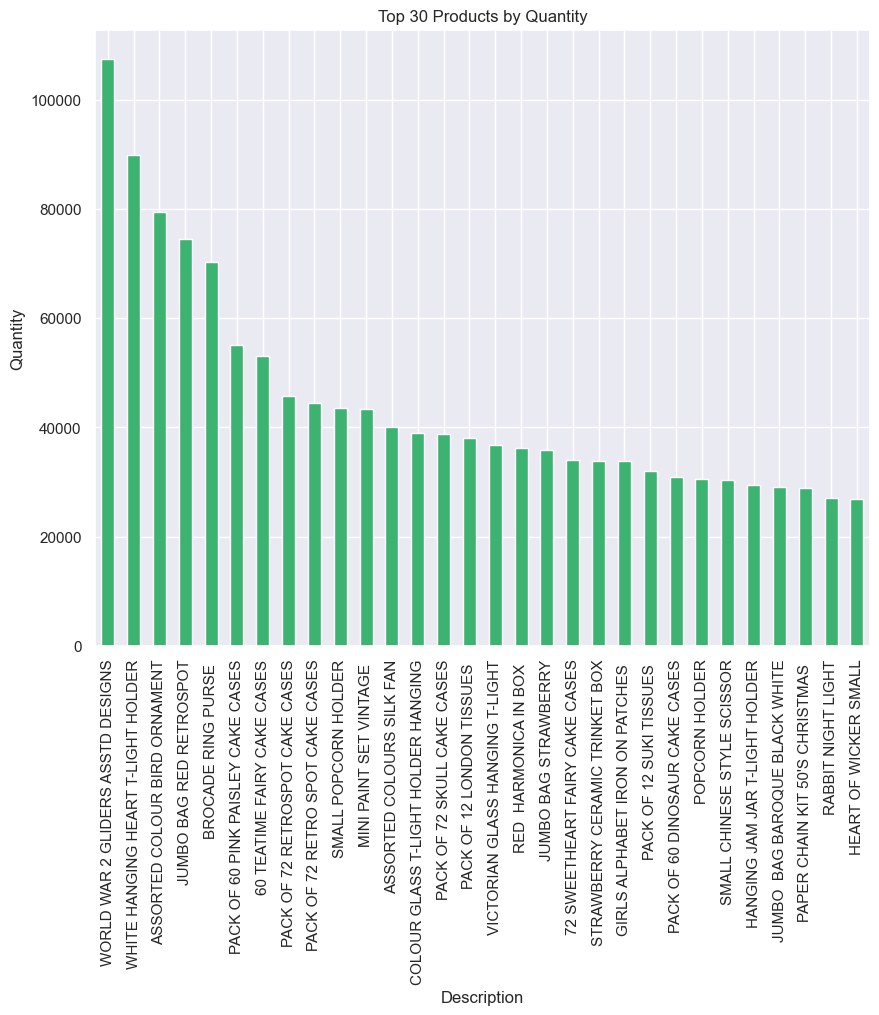

In [39]:
top_items = (
    data.groupby("Description")
    .sum(numeric_only=True)  # Ensure only numeric columns are summed
    .sort_values(by="Quantity", ascending=False)
    .head(30)["Quantity"]
)

# Plot the top 30 items
plt.figure(figsize=(10, 8))
top_items.plot(kind="bar", color='mediumseagreen')
plt.xlabel("Description")
plt.ylabel("Quantity")
plt.title("Top 30 Products by Quantity")
plt.xticks(rotation=90)
plt.show()

In [40]:
temp_data = data.copy()

In [41]:
temp_data

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                     ...    ...          ...             ...  
1067366 2011-12-09 12:50:00   2.10      12680.0          France  
1067367 2011-12-09 12:50:00   4.15      12680.0          France  
1067368 2011-12-09 12:50:00   4.15      12680.0          France  
1067369 2011-12-09 12:50:00   4.95      12680.0          France  
1067370 2011-12-09 12:50:00  18.00      12680.0          France  

[824364 rows x 8 columns]

In [42]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [43]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [44]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)

In [45]:
temp_data

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Month  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom     12   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom     12   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom     12   
...                     ...    ...          ...             ...    ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France     12   
1067367 2011-12-09 12:50:00   4.15      12680.0          France     12   
1067368 2011-12-09 12:50:00   4.15      12680.0          France     12   
1067369 2011-12-09 12:50:00   4.95      12680.0          France     12   
1067370 2011-12-09 12:50:00  18.00      12680.0          France     12   

             Time  Year  Day  Quarter Day of Week  
0        07:45:00  2009    1        4     Tuesday  
1        07:45:00  2009    1        4     Tuesday  
2        07:45:00  2009    1        4     Tuesday  
3        07:45:00  2009    1        4     Tuesday  
4        07:45:00  2009    1        4     Tuesday  
...           ...   ...  ...      ...         ...  
1067366  12:50:00  2011    9        4      Friday  
1067367  12:50:00  2011    9        4      Friday  
1067368  12:50:00  2011    9        4      Friday  
1067369  12:50:00  2011    9        4      Friday  
1067370  12:50:00  2011    9        4      Friday  

[824364 rows x 14 columns]

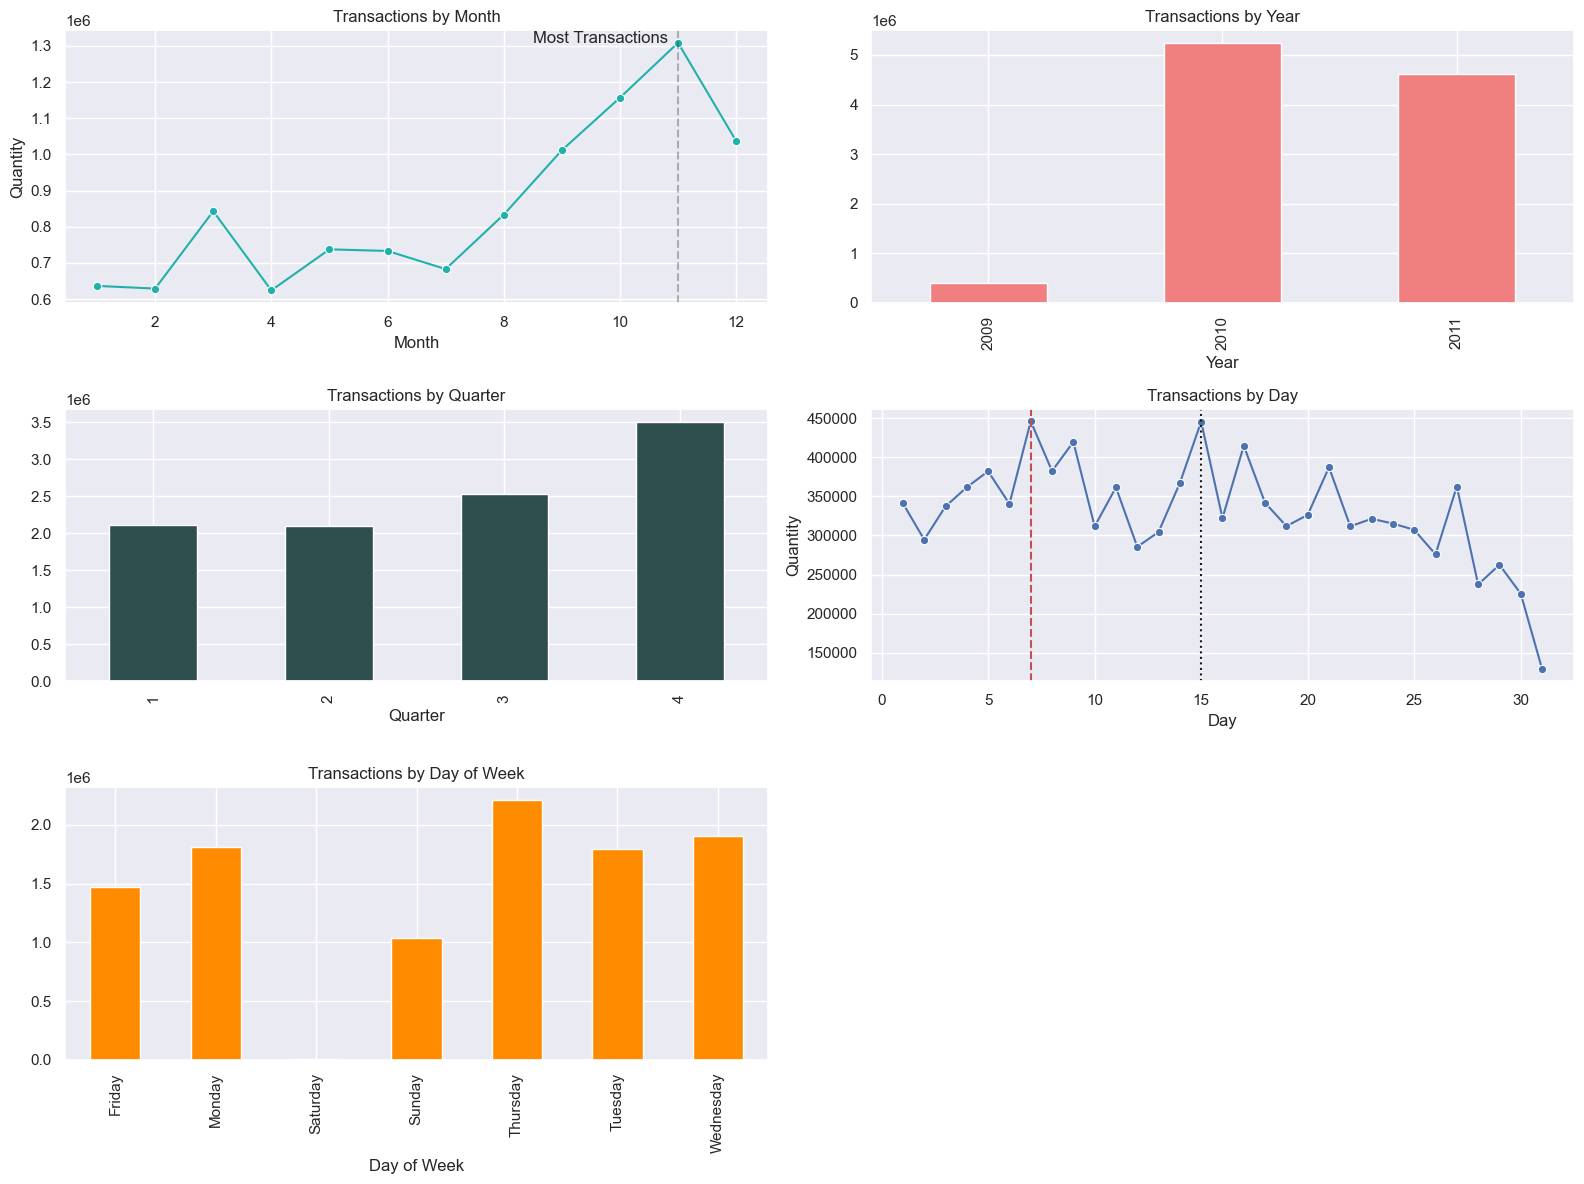

In [48]:
temp_data["Quantity"] = pd.to_numeric(temp_data["Quantity"], errors="coerce")

# Plotting
plt.figure(figsize=(16,12))

# Transactions by Month
plt.subplot(3,2,1)
monthly_data = temp_data.groupby("Month").sum(numeric_only=True)
sns.lineplot(x=monthly_data.index, y="Quantity", data=monthly_data, marker="o", color="lightseagreen")
plt.axvline(11, color="k", linestyle='--', alpha=0.3)
plt.text(8.50, monthly_data["Quantity"].max(), "Most Transactions")
plt.title("Transactions by Month")

# Transactions by Year
plt.subplot(3,2,2)
yearly_data = temp_data.groupby("Year").sum(numeric_only=True)
yearly_data["Quantity"].plot(kind="bar", color="lightcoral")
plt.title("Transactions by Year")

# Transactions by Quarter
plt.subplot(3,2,3)
quarterly_data = temp_data.groupby("Quarter").sum(numeric_only=True)
quarterly_data["Quantity"].plot(kind="bar", color="darkslategrey")
plt.title("Transactions by Quarter")

# Transactions by Day
plt.subplot(3,2,4)
daily_data = temp_data.groupby("Day").sum(numeric_only=True)
sns.lineplot(x=daily_data.index, y="Quantity", data=daily_data, marker="o")
plt.axvline(7, color='r', linestyle='--')
plt.axvline(15, color='k', linestyle="dotted")
plt.title("Transactions by Day")

# Transactions by Day of Week
plt.subplot(3,2,5)
day_of_week_data = temp_data.groupby("Day of Week").sum(numeric_only=True)
day_of_week_data["Quantity"].plot(kind="bar", color="darkorange")
plt.title("Transactions by Day of Week")

plt.tight_layout()
plt.show()

In [49]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 390286
--------------------------------------------
Total Number of Countries in 2009: 37
Total Number of Transactions in 2009: 5233315
--------------------------------------------
Total Number of Countries in 2009: 36
Total Number of Transactions in 2009: 4610527


In [50]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [51]:
#checking for the countries which are available in  2010 and 2011 but not in 2009.

no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [54]:
data["Quantity"] = pd.to_numeric(data["Quantity"], errors="coerce")

In [55]:
temp = data.groupby(["Country", "Description"]).sum(numeric_only=True)["Quantity"]

In [56]:
temp = pd.DataFrame(temp)

In [57]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

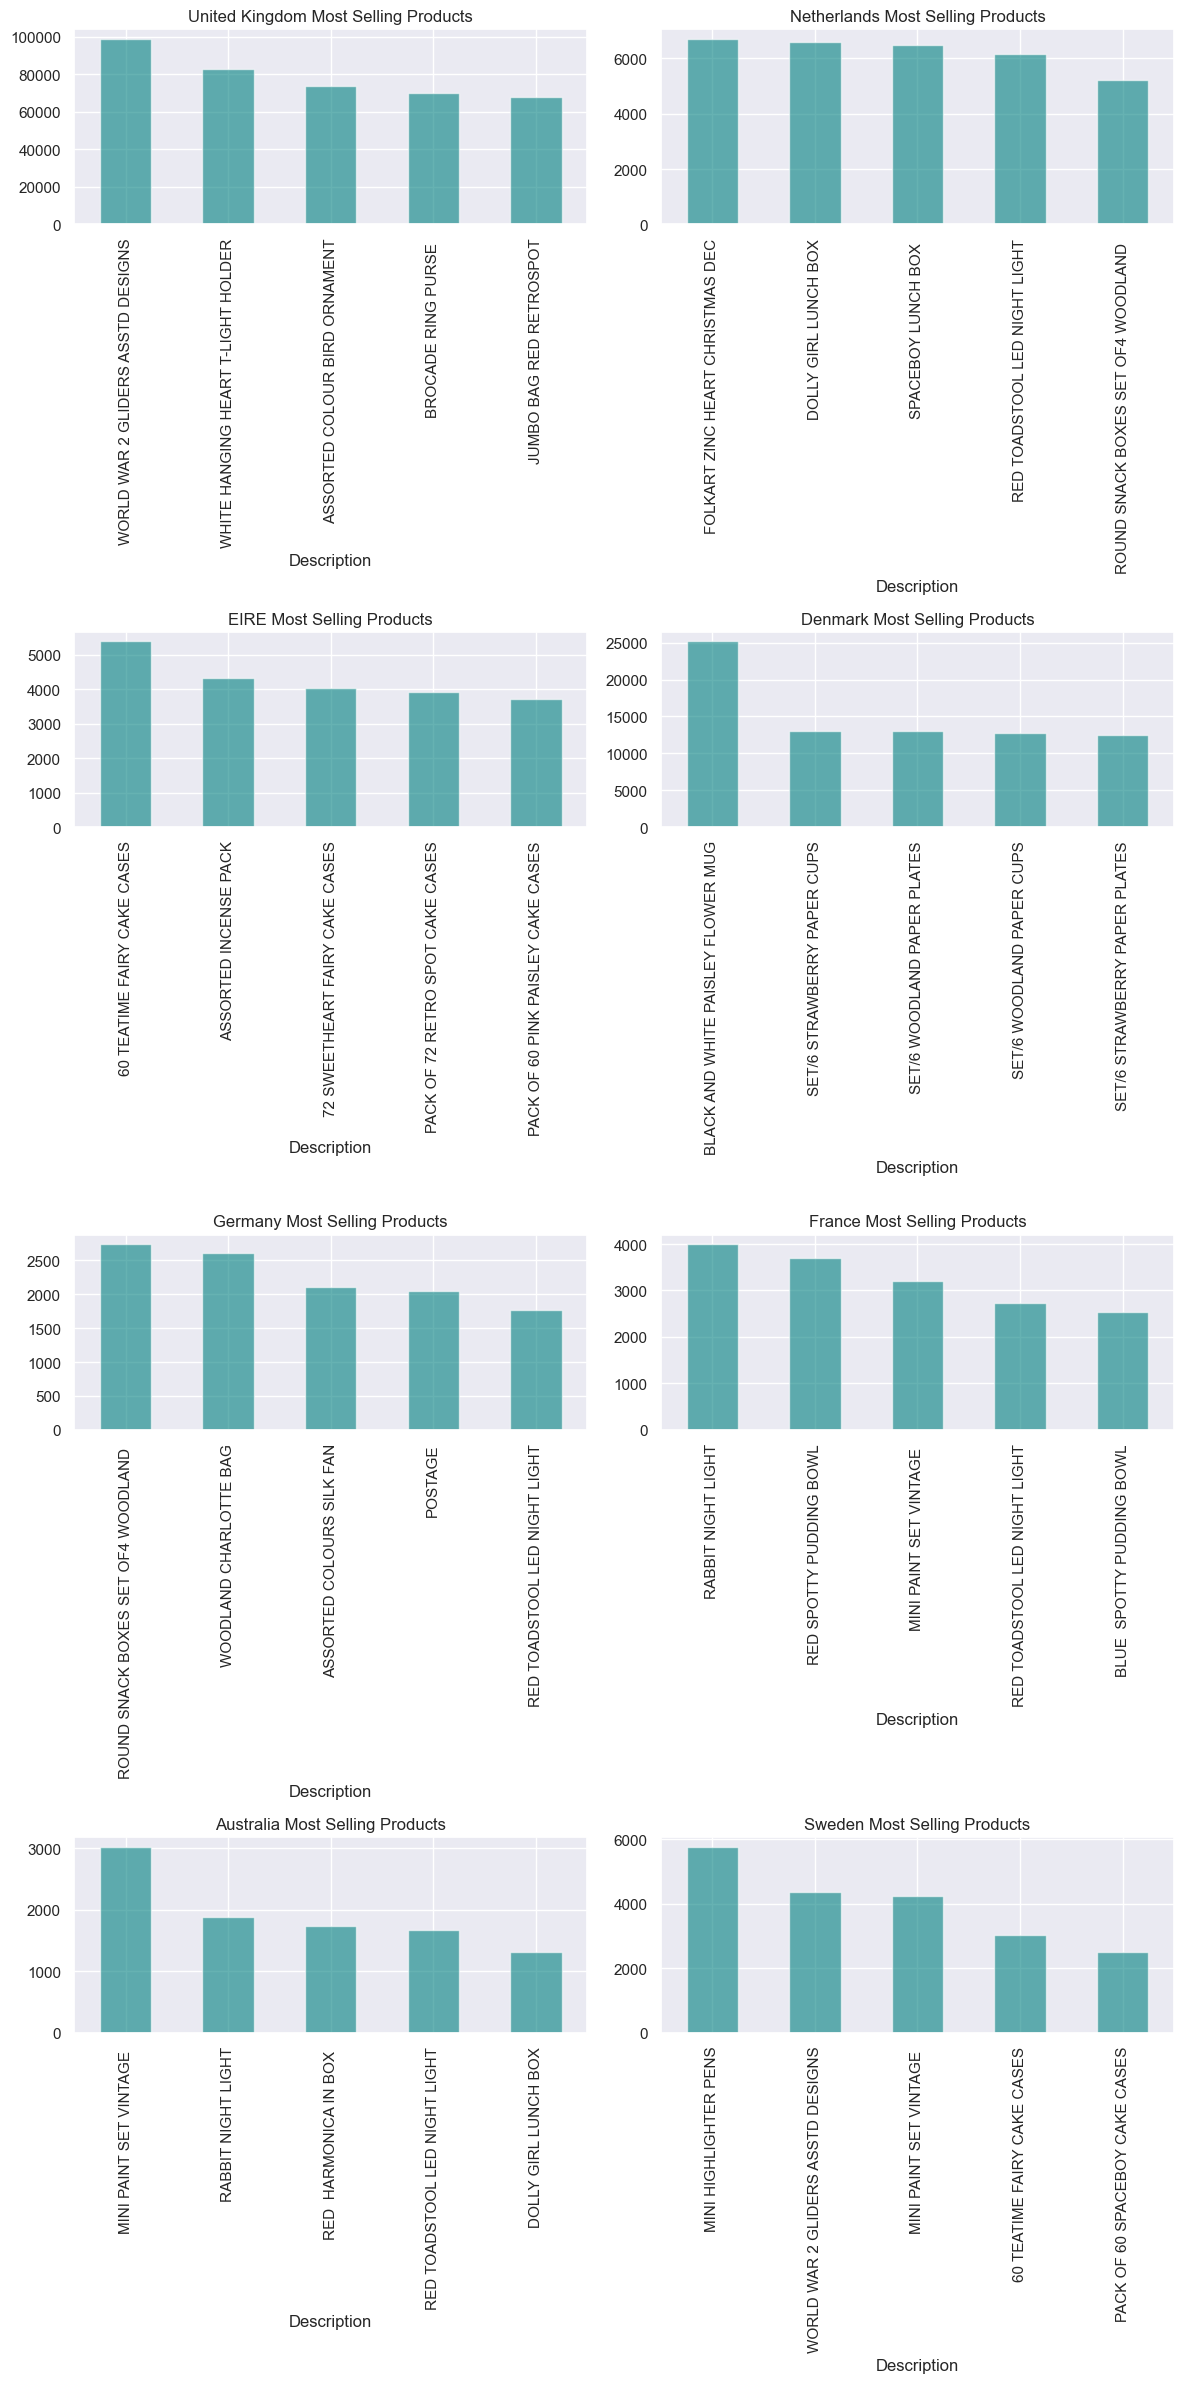

In [58]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

In [59]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]

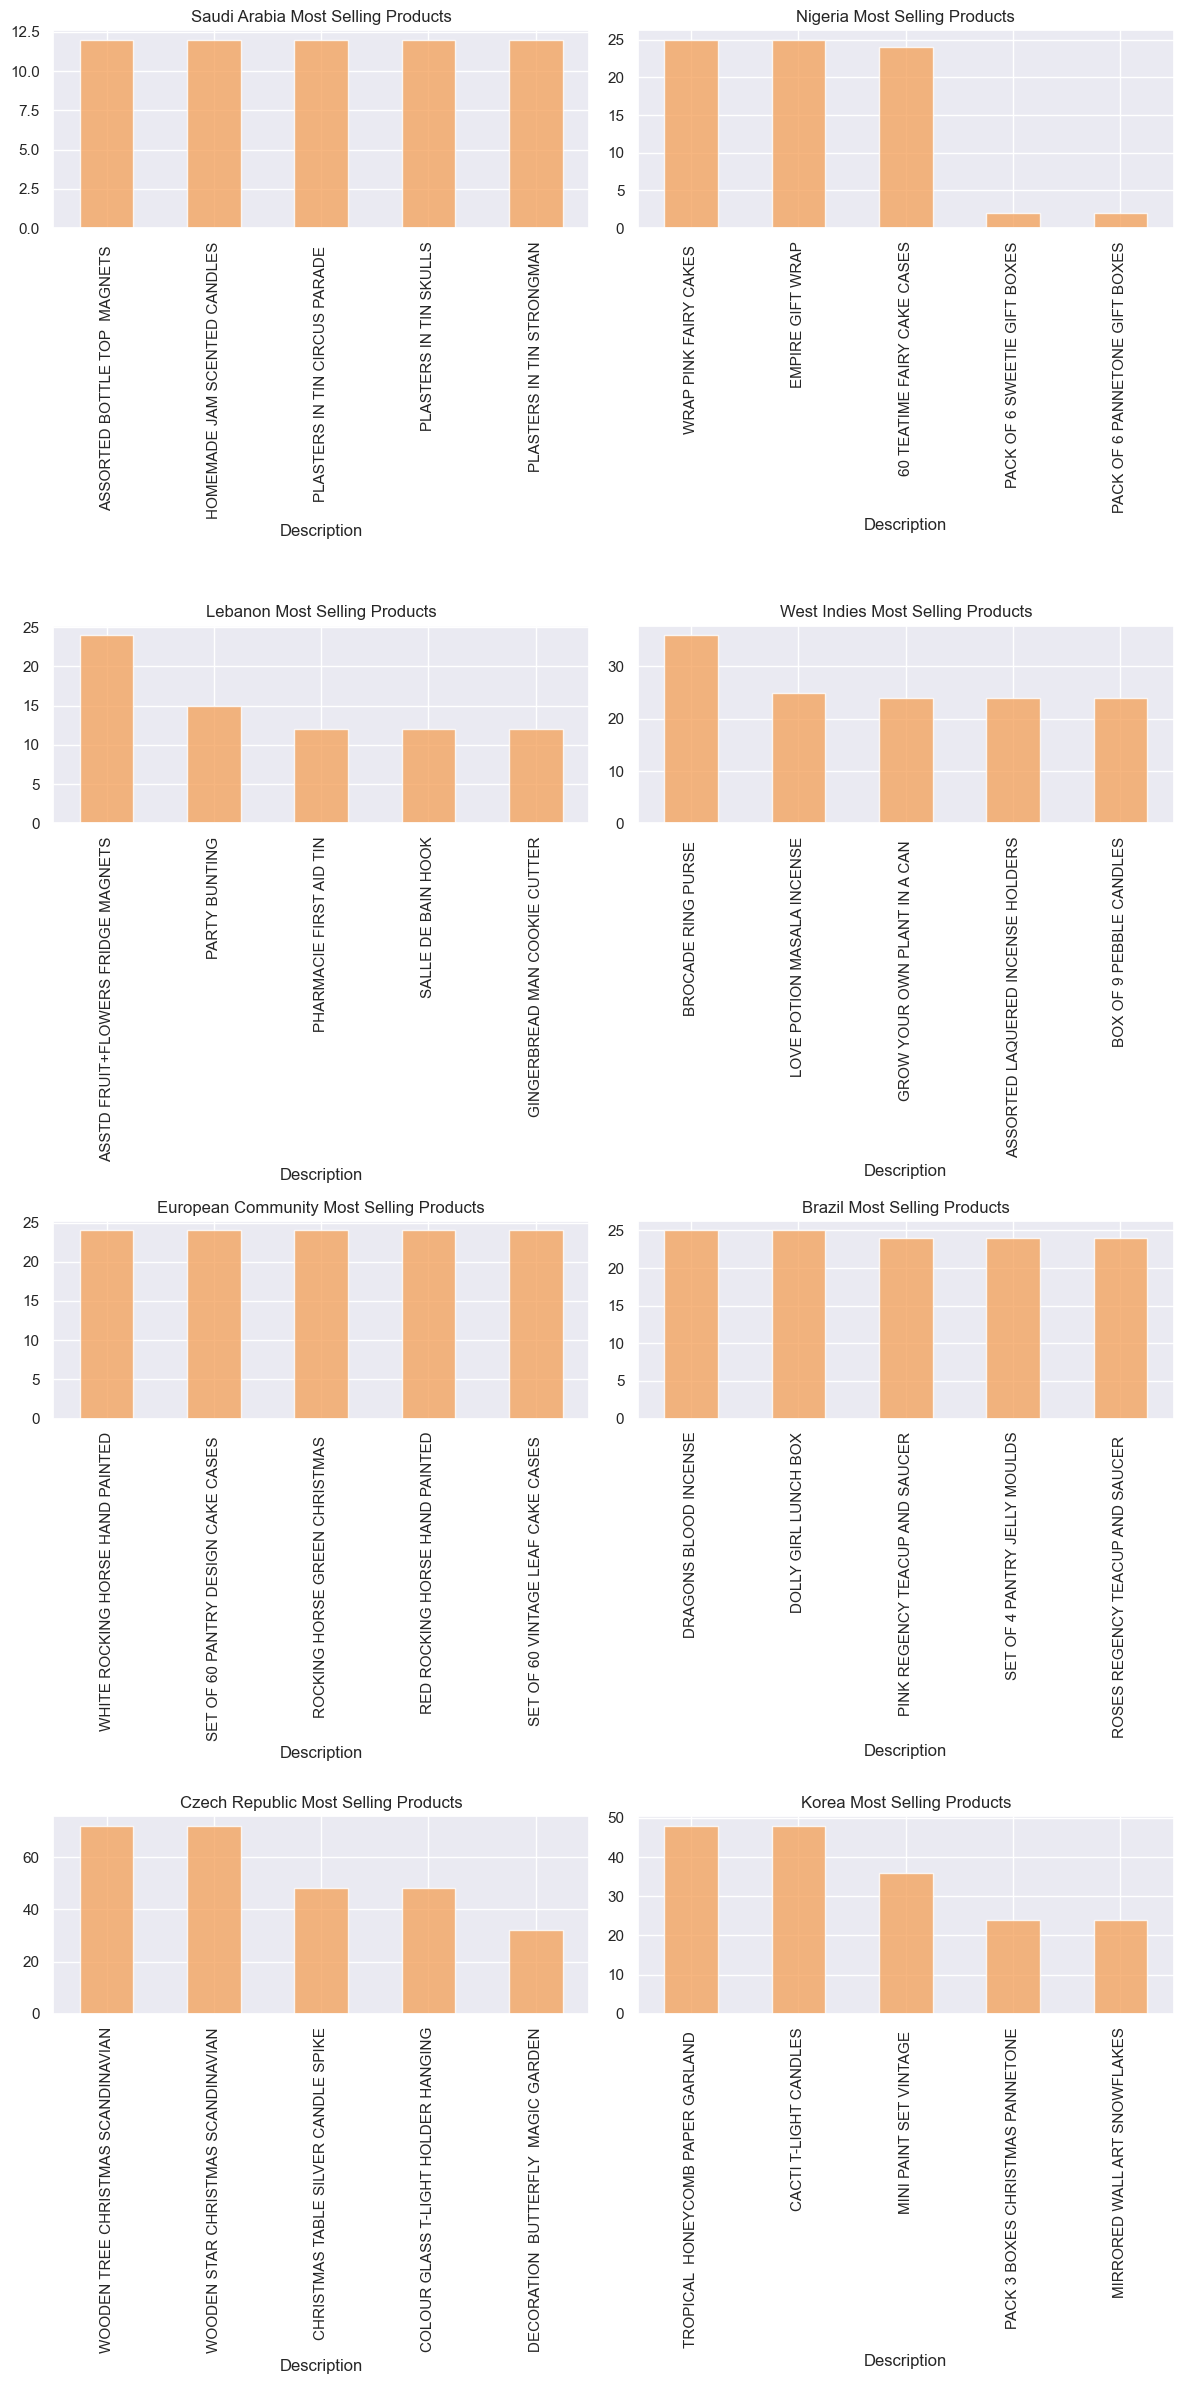

In [60]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    
    plt.tight_layout()

In [61]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [62]:
data["Total Amount"] = data["Quantity"]*data["Price"]

In [63]:
summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")

In [64]:
summary = summary.reset_index() #resetting the index

In [65]:
summary.shape

(5942, 5)

In [66]:
summary.head()

Customer ID  frequency  recency      T  monetary_value
0      12346.0       10.0    400.0  725.0      -15.468000
1      12347.0        7.0    402.0  404.0      717.398571
2      12348.0        4.0    363.0  438.0      449.310000
3      12349.0        4.0    717.0  735.0     1107.172500
4      12350.0        0.0      0.0  310.0        0.000000

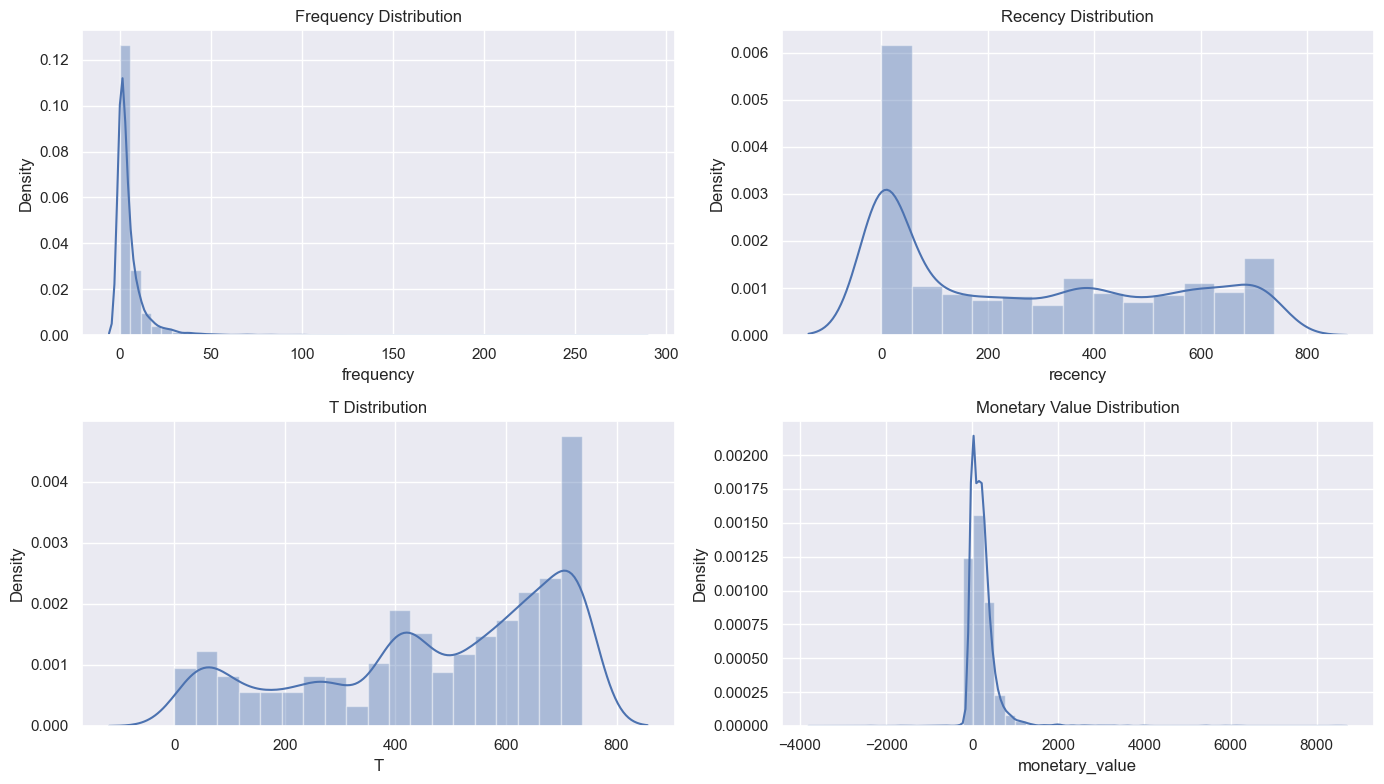

In [67]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

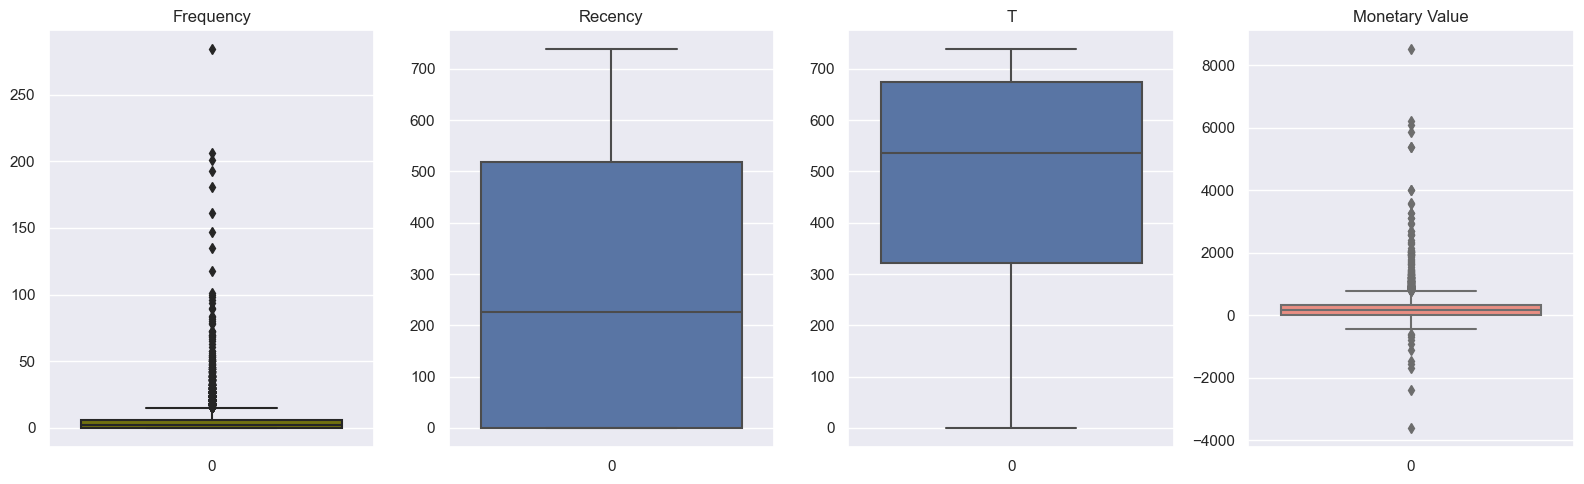

In [68]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(summary["monetary_value"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [69]:
summary.describe()

Customer ID    frequency      recency            T  monetary_value
count   5942.000000  5942.000000  5942.000000  5942.000000     5942.000000
mean   15316.500000     5.479636   275.772299   478.229384      228.814496
std     1715.451981    11.293673   259.830840   223.879537      363.067124
min    12346.000000     0.000000     0.000000     0.000000    -3610.500000
25%    13831.250000     0.000000     0.000000   320.500000        0.000000
50%    15316.500000     2.000000   225.000000   536.000000      174.900625
75%    16801.750000     6.000000   518.000000   674.000000      314.594375
max    18287.000000   284.000000   738.000000   738.000000     8513.271143

In [70]:
#checking for the values containing zero.

print("Total Number of Frequency with 0: %s" % (len(summary[summary["frequency"] == 0])))
print("Total Number of Recency with 0: %s" % (len(summary[summary["recency"] == 0])))
print("Total Number of Monetary Value with 0: %s" % (len(summary[summary["monetary_value"] == 0])))

Total Number of Frequency with 0: 1544
Total Number of Recency with 0: 1544
Total Number of Monetary Value with 0: 1547


In [71]:
summary_bgf = summary.copy()

In [72]:
summary_bgf.head(2)

Customer ID  frequency  recency      T  monetary_value
0      12346.0       10.0    400.0  725.0      -15.468000
1      12347.0        7.0    402.0  404.0      717.398571

In [73]:
bgf = BetaGeoFitter(penalizer_coef = 0.0)

In [74]:
bgf.fit(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>

In [75]:
bgf.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r       0.668170  0.015453         0.637882         0.698458
alpha  49.943472  1.517728        46.968725        52.918220
a       0.145498  0.014512         0.117055         0.173941
b       2.112726  0.313787         1.497704         2.727749

In [76]:
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>


<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

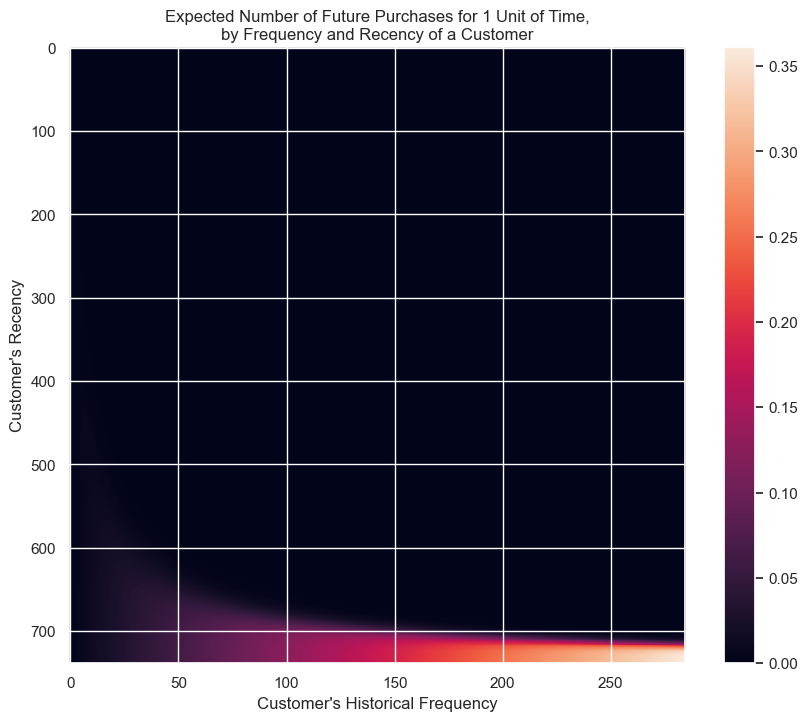

In [77]:
#plotting the frequency and recency matrix
plt.figure(figsize=(10,8))
plot_frequency_recency_matrix(bgf)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

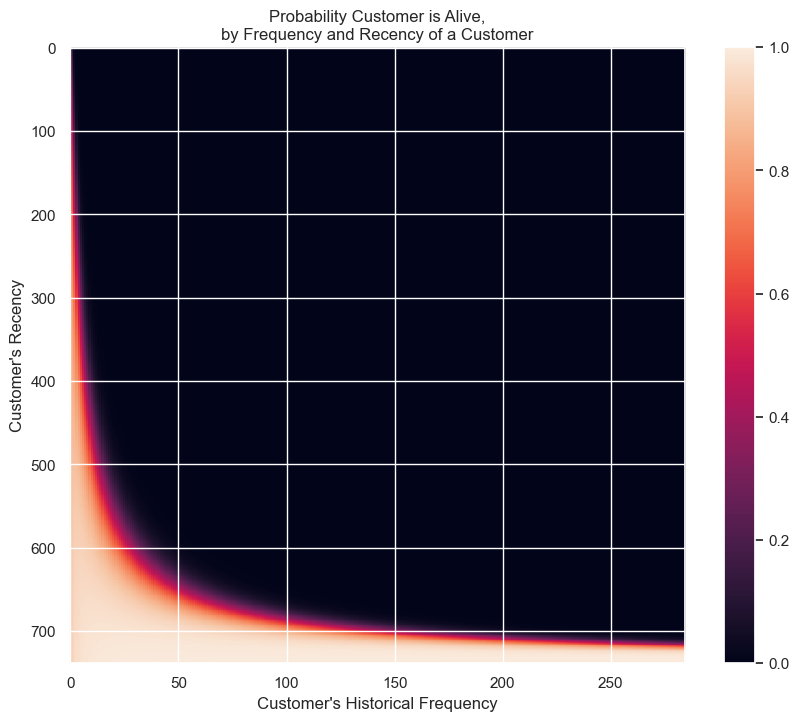

In [78]:
#plotting the churn matrix
plt.figure(figsize=(10,8))
plot_probability_alive_matrix(bgf)

In [79]:
t = 30
summary_bgf["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

In [80]:
summary_bgf.sort_values(by = "predicted_purchases").tail(5)

Customer ID  frequency  recency      T  monetary_value  \
2260      14606.0      181.0    735.0  736.0      165.079448   
5495      17841.0      193.0    736.0  737.0      357.437461   
2965      15311.0      201.0    738.0  738.0      560.647015   
402       12748.0      206.0    735.0  735.0      241.501117   
2565      14911.0      284.0    737.0  738.0      948.996127   

      predicted_purchases  
2260             6.908522  
5495             7.355876  
2965             7.651860  
402              7.871598  
2565            10.800953

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

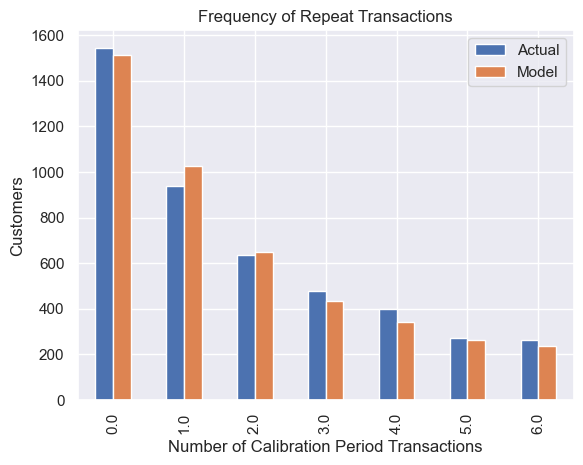

In [81]:
plot_period_transactions(bgf)

In [82]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [83]:
pd.DataFrame(summary_cal_holdout.head())

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [84]:
bgf.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.BetaGeoFitter: fitted with 5025 subjects, a: 0.22, alpha: 49.70, b: 2.72, r: 0.67>

In [85]:
summary_cal_holdout

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   
...                    ...          ...    ...                ...   
18283.0                9.0        458.0  474.0                9.0   
18284.0                1.0          2.0  247.0                0.0   
18285.0                0.0          0.0  476.0                0.0   
18286.0                2.0        247.0  539.0                0.0   
18287.0                4.0        537.0  554.0                2.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0  
...                       ...  
18283.0                 184.0  
18284.0                 184.0  
18285.0                 184.0  
18286.0                 184.0  
18287.0                 184.0  

[5025 rows x 5 columns]

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

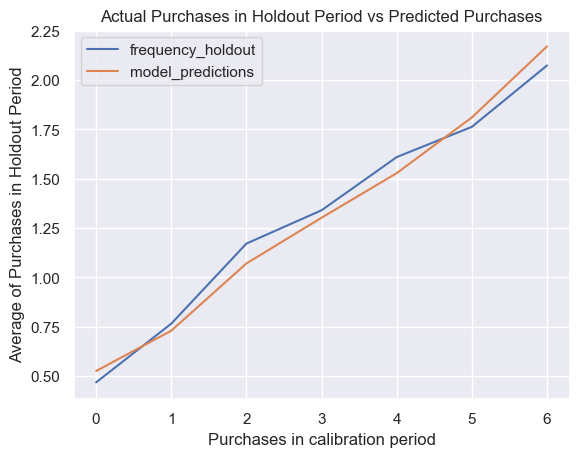

In [86]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [88]:
summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [89]:
#Creating a function which can predict the future purchased value based on the lookup window

def bgf_get_pred_error(t, id_):
    
    individual = summary_bgf[summary_bgf["Customer ID"] == id_]
    
    ind_pred = bgf.predict(t, individual["frequency"], individual["recency"], individual["T"])
    
    actual_val = individual["frequency"]/individual["recency"]*t
    
    error = actual_val - ind_pred
    
    print("Your Predicted Purchase: %s" % (ind_pred))
    print("Your Actual Purchase: %s" % (actual_val))
    print("Prediction Error: %s" % (error))

In [90]:
bgf_get_pred_error(15, 12348.0)

Your Predicted Purchase: 2    0.132161
dtype: float64
Your Actual Purchase: 2    0.165289
dtype: float64
Prediction Error: 2    0.033128
dtype: float64


In [92]:
id_1 = 14606.0
id_2 = 12347.0

In [93]:
days_since_birth = 365

In [122]:
sp_trans_1 = data[data["Customer ID"] == id_1]
sp_trans_2 = data[data["Customer ID"] == id_2]

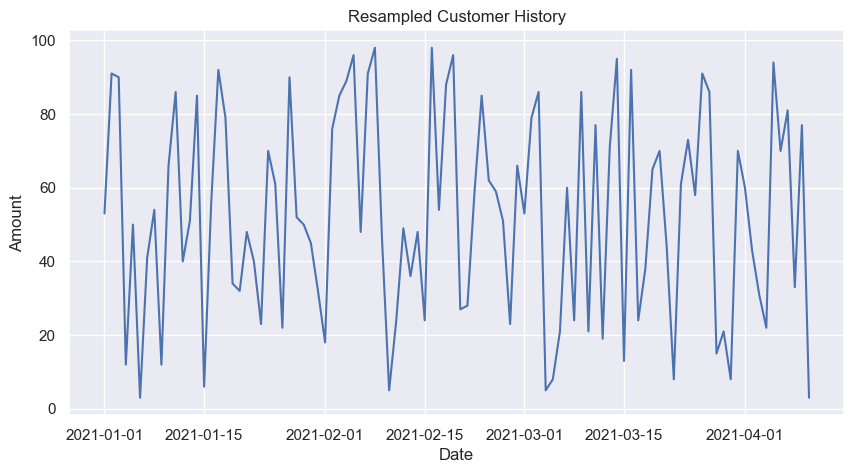

In [125]:
data = {
    'InvoiceDate': pd.date_range(start='2021-01-01', periods=100, freq='D'),
    'Amount': np.random.randint(1, 100, size=100)
}
df = pd.DataFrame(data)

# Convert to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set the datetime column as index
df.set_index('InvoiceDate', inplace=True)

# Resample the data by the specified frequency (e.g., daily 'D', weekly 'W', etc.)
resampled_data = df.resample('D').sum()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(resampled_data.index, resampled_data['Amount'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Resampled Customer History')
plt.show()

In [127]:
summary_bgf["actual_30"] = summary_bgf["frequency"]/summary_bgf["recency"]*30

In [128]:
summary_bgf.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30  
0             0.077362   0.750000  
1             0.495352   0.522388  
2             0.269178   0.330579  
3             0.172500   0.167364  
4             0.055446        NaN

In [129]:
summary_bgf = summary_bgf.fillna(value = 0)

In [130]:
summary_bgf["Error"] = summary_bgf["actual_30"] - summary_bgf["predicted_purchases"]

In [131]:
mse = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])

In [132]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_bgf["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.337882659974868
Average Error:  0.4117976553678272
Root Mean Squared Error: 2.0827584257361362


In [134]:
bgf_mse_purchase_30 = mean_squared_error(summary_bgf["actual_30"], summary_bgf["predicted_purchases"])
bgf_rmse_purchase_30 = sqrt(bgf_mse_purchase_30)  # Corrected variable name
bgf_avg_error_purchase_30 = summary_bgf["Error"].mean()

print(f'MSE: {bgf_mse_purchase_30}')
print(f'RMSE: {bgf_rmse_purchase_30}')
print(f'Average Error: {bgf_avg_error_purchase_30}')

MSE: 4.337882659974868
RMSE: 2.0827584257361362
Average Error: 0.4117976553678272


In [135]:
summary_bgf.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30     Error  
0             0.077362   0.750000  0.672638  
1             0.495352   0.522388  0.027036  
2             0.269178   0.330579  0.061401  
3             0.172500   0.167364 -0.005136  
4             0.055446   0.000000 -0.055446

In [136]:
#Filtering the data where we have the values of 0 or less than 0.
res_summary = summary_bgf[summary_bgf["frequency"] > 0]

In [137]:
final_summary = res_summary[res_summary["monetary_value"] > 0]

<Axes: >

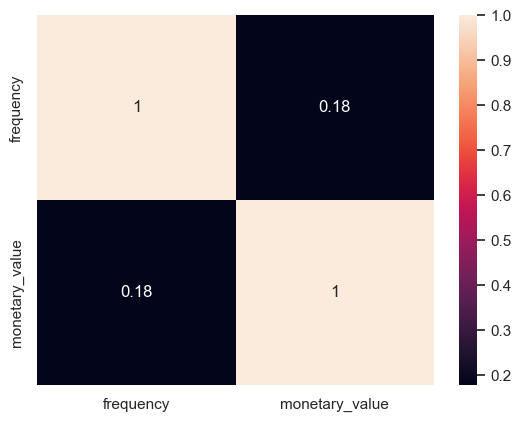

In [138]:
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

In [139]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.37, q: 3.86, v: 696.90>

In [140]:
ggf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    1.374683   0.058567         1.259892         1.489475
q    3.864415   0.134545         3.600708         4.128123
v  696.904781  50.767856       597.399783       796.409779

In [141]:
summary_bgf.head(2)

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   

   predicted_purchases  actual_30     Error  
0             0.077362   0.750000  0.672638  
1             0.495352   0.522388  0.027036

In [142]:
summary_ = summary_bgf[(summary_bgf["monetary_value"] > 0) & (summary_bgf["frequency"] > 0)]
summary_.shape

(4185, 8)

In [143]:
summary_["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_["frequency"], 
                                                                        summary_["monetary_value"])
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  
1             0.495352   0.522388  0.027036          629.556290  
2             0.269178   0.330579  0.061401          409.972301  
3             0.172500   0.167364 -0.005136          842.513995  
6             0.566836   0.674157  0.107321          242.209404  
7             0.091934   0.147059  0.055125          254.858476

In [144]:
print("Expected Average Sales: %s" % summary_["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_["monetary_value"].mean())
print("Difference: %s" % (summary_["monetary_value"].mean() - summary_["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"])))

Expected Average Sales: 340.18897558292696
Actual Average Sales: 330.6608495198251
Difference: -9.528126063101865
Mean Squared Error: 20896.88188078676
Root Mean Squared Error: 144.55753830494888


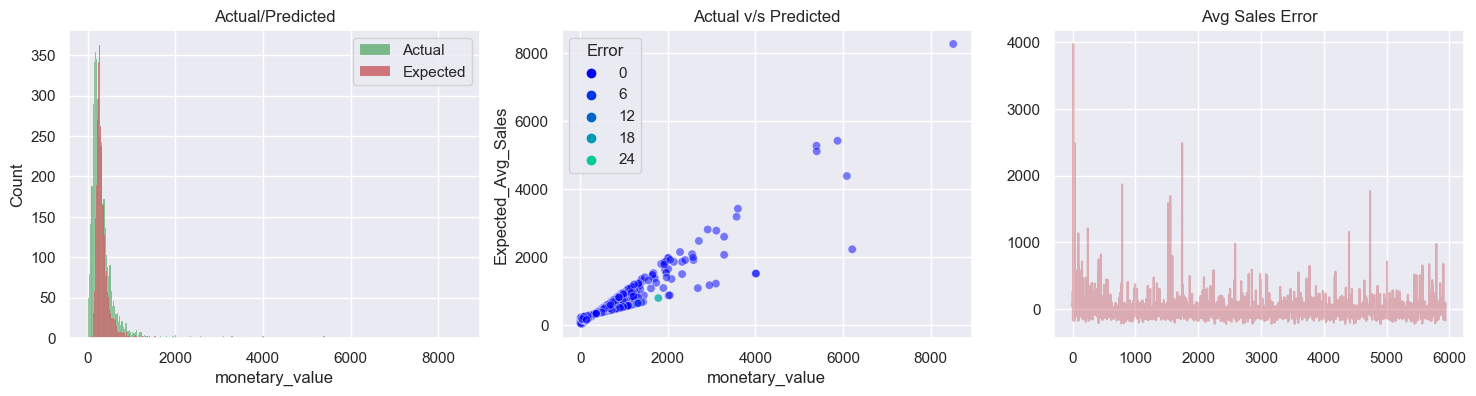

In [146]:
plt.figure(figsize=(18, 4))

# Plot 1
plt.subplot(131)
sns.histplot(summary_["monetary_value"], color="g", kde=False)
sns.histplot(summary_["Expected_Avg_Sales"], color="r", kde=False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])

# Plot 2
plt.subplot(132)
sns.scatterplot(x=summary_["monetary_value"], y=summary_["Expected_Avg_Sales"], alpha=0.5, hue=summary_["Error"], palette="winter")
plt.title("Actual v/s Predicted")

# Plot 3
plt.subplot(133)
plt.plot(summary_["monetary_value"] - summary_["Expected_Avg_Sales"], color='r', alpha=0.4)
plt.title("Avg Sales Error")

plt.show()

In [147]:
summary_["predicted_clv"] = ggf.customer_lifetime_value(bgf,
                                                       summary_["frequency"],
                                                       summary_["recency"],
                                                       summary_["T"],
                                                       summary_["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [148]:
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  predicted_clv  
1             0.495352   0.522388  0.027036          629.556290    7110.166375  
2             0.269178   0.330579  0.061401          409.972301    2512.081673  
3             0.172500   0.167364 -0.005136          842.513995    3449.798774  
6             0.566836   0.674157  0.107321          242.209404    3100.010138  
7             0.091934   0.147059  0.055125          254.858476     536.035114

In [149]:
summary_["CLV"] = summary_["predicted_clv"]*0.05
summary_[summary_["Customer ID"] == 13902.0]

Customer ID  frequency  recency      T  monetary_value  \
1556      13902.0        5.0     99.0  731.0        6085.692   

      predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1556             0.000758   1.515152  1.514393         4393.947298   

      predicted_clv       CLV  
1556      56.677321  2.833866

In [150]:
summary_.sort_values(by = "Error", ascending = False)

Customer ID  frequency  recency      T  monetary_value  \
5276      17622.0        2.0      2.0  598.0         194.145   
3448      15794.0        1.0      1.0  737.0         102.000   
2884      15230.0        1.0      1.0  240.0          59.400   
5045      17391.0        1.0      1.0  164.0         101.760   
2446      14792.0        1.0      1.0   64.0           6.200   
...           ...        ...      ...    ...             ...   
1677      14023.0        1.0    243.0  250.0         310.930   
4149      16495.0        1.0    273.0  276.0         437.900   
2174      14520.0        1.0    289.0  290.0         105.600   
4904      17250.0        1.0    258.0  261.0         221.870   
1058      13404.0        1.0    211.0  212.0          34.680   

      predicted_purchases  actual_30      Error  Expected_Avg_Sales  \
5276             0.003059  30.000000  29.996941          265.738713   
3448             0.008321  30.000000  29.991679          259.074204   
2884             0.076162  30.000000  29.923838          245.259590   
5045             0.132262  30.000000  29.867738          258.996375   
2446             0.342512  30.000000  29.657488          228.007537   
...                   ...        ...        ...                 ...   
1677             0.154797   0.123457  -0.031340          326.827426   
4149             0.142739   0.109890  -0.032849          368.002110   
2174             0.136983   0.103806  -0.033177          260.241636   
4904             0.149580   0.116279  -0.033301          297.946452   
1058             0.177494   0.142180  -0.035314          237.243222   

      predicted_clv        CLV  
5276      14.937363   0.746868  
3448      44.309988   2.215499  
2884     381.340230  19.067012  
5045     696.754608  34.837730  
2446    1549.261568  77.463078  
...             ...        ...  
1677    1139.053953  56.952698  
4149    1191.242796  59.562140  
2174     811.317591  40.565880  
4904    1006.736400  50.336820  
1058     937.220109  46.861005  

[4185 rows x 11 columns]

In [151]:
actual = summary_["monetary_value"]*summary_["actual_30"]
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]
error = actual - pred
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 108.19828103163599
Mean Squared Error: 907287.2534809991
Root Mean Squared Error: 952.516274654139


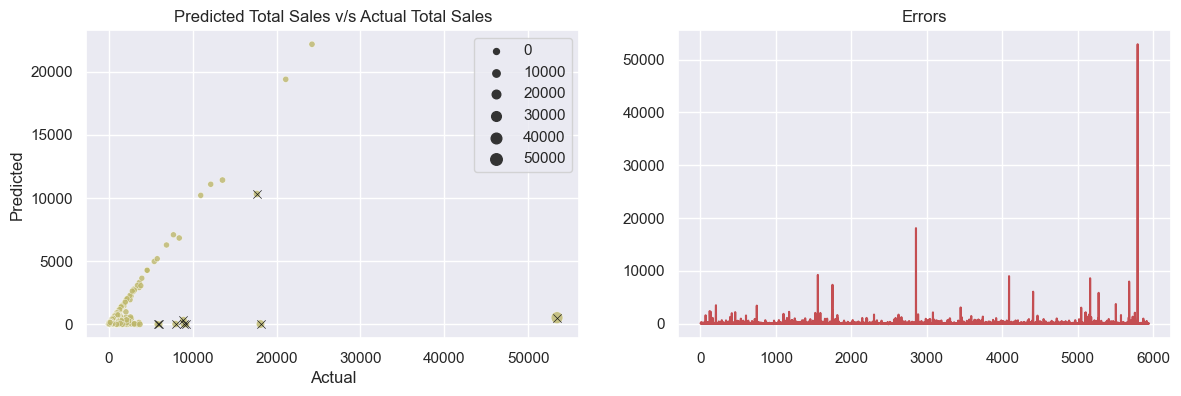

In [154]:
plt.figure(figsize=(14, 4))

# Plot 1
plt.subplot(121)
sns.scatterplot(x=result["Actual"], y=result["Predicted"], size=result["Error"], color="darkkhaki", alpha=0.8, marker='o')
sns.scatterplot(x=result[result["Error"] > 5000]["Actual"], y=result[result["Error"] > 5000]["Predicted"], color="k", marker="x")
plt.title("Predicted Total Sales v/s Actual Total Sales")

# Plot 2
plt.subplot(122)
plt.plot(result["Error"], color="r")
plt.title("Errors")

plt.show()